In [2]:
# Szymon Manduk
# July 17, 2021
# Import data from one of the embedded datasets and iterate over data
# The notebook is a part of "Data preparation with Dataset and DataLoader in Pytorch" blog post
# https://aigeekprogrammer.com/data-preparation-with-dataset-and-dataloader-in-pytorch/

In [3]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets

In [4]:
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [5]:
training_dataset = datasets.MNIST(root='mnistdata', train=True, transform=ToTensor(), download=True)

F:\Anaconda3\envs\pytorch_env\lib\site-packages\torchvision\datasets\mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ..\torch\csrc\utils\tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
# get the sample data and label and display it
image, label = training_dataset[100]
print(type(image))
print(image.size())
print(type(label))

<class 'torch.Tensor'>
torch.Size([1, 28, 28])
<class 'int'>


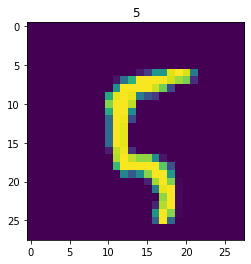

In [7]:
# and let's draw the actual picture
plt.imshow(image.squeeze())
plt.title(label)
plt.show()

In [8]:
# The Dataset retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want 
# to pass samples in “minibatches”, reshuffle the data at every epoch to reduce model overfitting, 
# and use Python’s multiprocessing to speed up data retrieval.
from torch.utils.data import DataLoader

In [9]:
dataloader = DataLoader(
    dataset=training_dataset,
    batch_size=5
)

In [10]:
images, labels = next(iter(dataloader))
print(type(images), type(labels))
print(images.size(), labels.size())

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([5, 1, 28, 28]) torch.Size([5])


In [11]:
idx = 2
label = labels[idx].item()
image = images[idx]

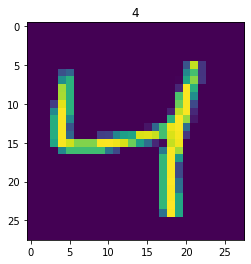

In [12]:
plt.imshow(image.squeeze())
plt.title(label)
plt.show()